In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import pandas as pd
%matplotlib inline

In [2]:
# Normalnoe raspredelenie
mu=2
sigma=0.5

norm_rv=sts.norm(loc=mu, scale=sigma)
norm_rv.rvs(10)

array([2.52662638, 1.47092705, 2.36746992, 1.75984795, 1.77584012,
       1.28461819, 1.30901742, 1.97464982, 2.47914001, 2.08371426])

In [3]:
norm_rv.cdf(3)

0.9772498680518208

In [5]:
norm_rv.pdf(3)

0.10798193302637613

Text(0.5,1,'Norm raspredelenie')

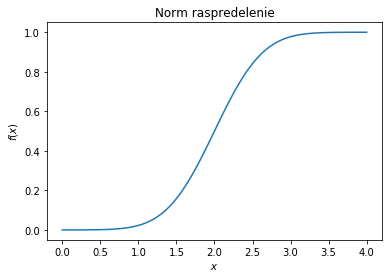

In [6]:
x=np.linspace(0,4, 100)
mycdf=norm_rv.cdf(x)
plt.plot(x, mycdf)
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.title("Norm raspredelenie")

Text(0.5,1,'Norm plotnost')

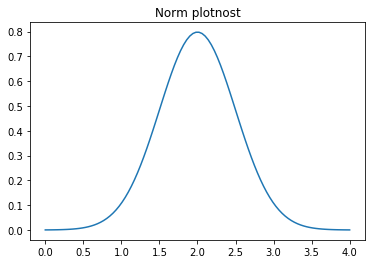

In [7]:
mypdf=norm_rv.pdf(x)
plt.plot(x, mypdf)
plt.title("Norm plotnost")

In [8]:
# ravnomernoe raspredelenie na otreske
a=1
b=4
ravn_rv=sts.uniform(a, b-a)
ravn_rv.rvs(10)

array([2.22173285, 2.91416194, 3.65735377, 1.21176763, 1.45304293,
       1.52976743, 3.80725485, 2.71346922, 1.65498922, 3.41052097])

Text(0.5,1,'ravnomernoe raspred')

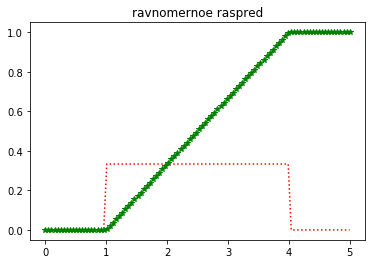

In [14]:
x=np.linspace(0,5,100)
mypdf=ravn_rv.pdf(x)
mycdf=ravn_rv.cdf(x)
plt.plot(x, mypdf, 'r:', x, mycdf, "g*")
plt.title ("ravnomernoe raspred")

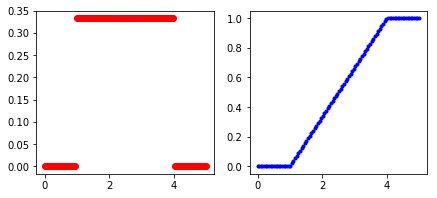

In [27]:
fig=plt.figure()
fig, (ax1, ax2)=plt.subplots(nrows=1,ncols=2, figsize=(7,3))
ax1.plot(x,mypdf, 'ro')
ax2.plot(x,mycdf, 'b.')

In [15]:
# raspredelenie Bernoulli
bernoulli_rv=sts.bernoulli(0.5)
bernoulli_rv.rvs(10)

array([1, 1, 1, 0, 1, 0, 1, 1, 0, 1])

In [16]:
# binomialnoe raspredelenie
bin_rv=sts.binom(20, 0.7)
bin_rv.rvs(10)

array([18, 12, 16, 14, 11, 14, 13, 16, 13, 15])

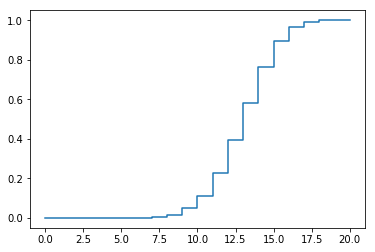

In [30]:
x=np.linspace(0,20, 21)
plt.step(x,bin_rv.cdf(x))

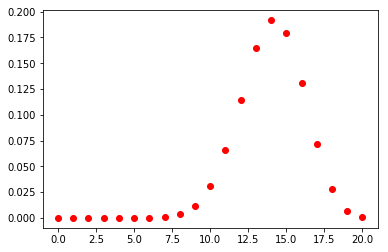

In [31]:
plt.plot(x,bin_rv.pmf(x), 'ro')

Text(0.5,1,'CDF binomial')

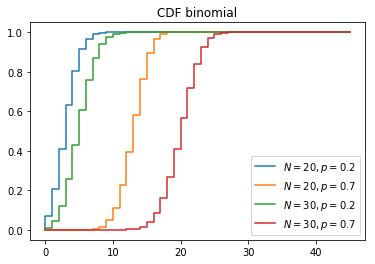

In [32]:
x=np.linspace(0,45,46)
for N in [20,30]:
    for p in [0.2, 0.7]:
        rv=sts.binom(N,p)
        cdf=rv.cdf(x)
        plt.step(x,cdf, label ="$N=%s, p=%s$" % (N,p))
plt.legend()
plt.title("CDF binomial")

Text(0.5,1,'PMF binomial')

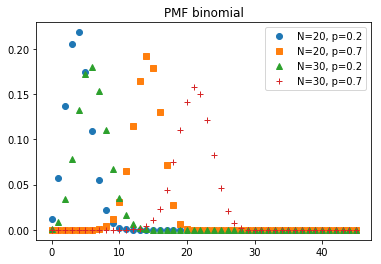

In [34]:
symbols=iter(['o', 's', '^', '+'])
for N in [20,30]:
    for p in [0.2, 0.7]:
        rv=sts.binom(N,p)
        pmf=rv.pmf(x)
        plt.plot(x,pmf, next(symbols), label="N=%s, p=%s" % (N,p))
plt.legend()
plt.title("PMF binomial")

In [35]:
# raspredelenie Puassona

poiss_rv=sts.poisson(5)
poiss_rv.rvs(10)

array([7, 7, 3, 6, 4, 4, 5, 3, 3, 7])

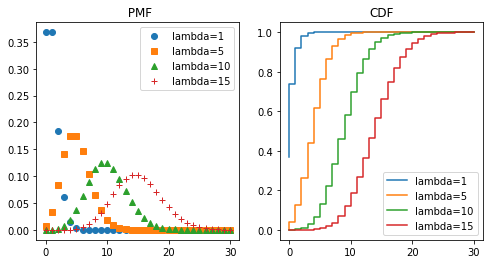

In [39]:
x=np.linspace(0,30,31)
symbols=iter(['o', 's', "^", '+'])
fig1=plt.figure()
fig1, (ax1, ax2)=plt.subplots(nrows=1, ncols=2, figsize=(8,4))
for l in [1,5,10,15]:
    rv=sts.poisson(l)
    ax1.plot(x, rv.pmf(x),next(symbols), label="lambda=%s" % l)
    ax2.step(x, rv.cdf(x),  label="lambda=%s" % l)
ax1.set_title(" PMF")
ax2.set_title("CDF")
ax1.legend()
ax2.legend()

In [42]:
# discretnoe raspredelenie obshego vida

elements=np.array([0,2,4,8])
probabilities=[0.1, 0.3, 0.5, 0.1]
np.random.choice(elements, 15, p=probabilities)

array([4, 4, 4, 4, 0, 2, 4, 2, 4, 4, 4, 0, 2, 4, 4])

# Статистики. Оценка распределения по выборке

In [43]:
sample=np.random.choice([1,2,3,4,5,6],100)

In [44]:
from collections import Counter
c=Counter(sample)
print(c)

Counter({5: 25, 2: 19, 4: 15, 3: 15, 6: 14, 1: 12})


In [45]:
print("Вероятности выпадения сторон кубика:") 
print({k: v/100.0 for k, v in c.items()}) # это оценка функции вероятности дискретного распред.

Вероятности выпадения сторон кубика:
{4: 0.15, 1: 0.12, 6: 0.14, 5: 0.25, 2: 0.19, 3: 0.15}


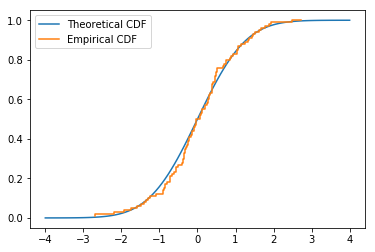

In [5]:
norm_rv=sts.norm(0,1)
sample=norm_rv.rvs(100)
x=np.linspace(-4,4,100)
cdf=norm_rv.cdf(x)
plt.plot(x, cdf, label="Theoretical CDF")

from statsmodels.distributions.empirical_distribution import ECDF

ecdf=ECDF(sample)

plt.step(ecdf.x, ecdf.y, label="Empirical CDF")
plt.legend(loc="upper left")

(array([0.03697817, 0.03697817, 0.1294236 , 0.25884719, 0.44373804,
        0.48071621, 0.20337994, 0.14791268, 0.07395634, 0.03697817]),
 array([-2.68633209, -2.14547244, -1.6046128 , -1.06375315, -0.5228935 ,
         0.01796614,  0.55882579,  1.09968544,  1.64054508,  2.18140473,
         2.72226438]),
 <a list of 10 Patch objects>)

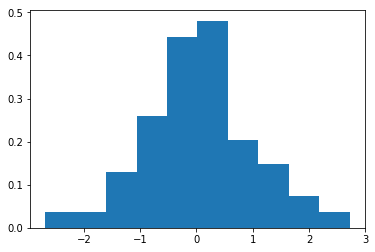

In [6]:
plt.hist(sample, normed=True)

(array([0.07395634, 0.        , 0.        , 0.07395634, 0.        ,
        0.07395634, 0.07395634, 0.        , 0.14791268, 0.14791268,
        0.14791268, 0.07395634, 0.        , 0.44373804, 0.29582536,
        0.29582536, 0.22186902, 0.66560706, 0.44373804, 0.44373804,
        0.3697817 , 0.3697817 , 0.66560706, 0.51769438, 0.07395634,
        0.22186902, 0.22186902, 0.29582536, 0.07395634, 0.22186902,
        0.14791268, 0.14791268, 0.14791268, 0.07395634, 0.07395634,
        0.        , 0.        , 0.        , 0.07395634, 0.07395634]),
 array([-2.68633209, -2.55111718, -2.41590227, -2.28068736, -2.14547244,
        -2.01025753, -1.87504262, -1.73982771, -1.6046128 , -1.46939789,
        -1.33418297, -1.19896806, -1.06375315, -0.92853824, -0.79332333,
        -0.65810842, -0.5228935 , -0.38767859, -0.25246368, -0.11724877,
         0.01796614,  0.15318105,  0.28839597,  0.42361088,  0.55882579,
         0.6940407 ,  0.82925561,  0.96447053,  1.09968544,  1.23490035,
         1.37011

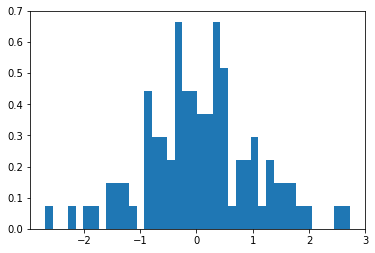

In [8]:
plt.hist(sample, normed=True, bins=40)

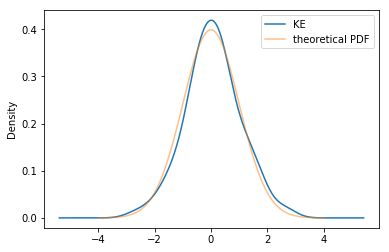

In [14]:
# эмпирическая оценка на основе ядерного сглаживани
df=pd.DataFrame(sample, columns=["KDE"])
ax=df.plot(kind='density')

x=np.linspace(-4,4,100)
pdf=norm_rv.pdf(x)
plt.plot(x,pdf, label="theoretical PDF", alpha=0.5)
plt.legend()